# Minería de datos
## Segundo Avance del Producto Integrador de Aprendizaje
### Base a trabajar: Estadísticas de suicidio de la OMS
#### URL: https://www.kaggle.com/szamil/who-suicide-statistics
#### Integrantes del Equipo 10, grupo 003:
- Andrea Isabel Cortez Sánchez 1736472
- Sergio Oviedo Martínez 1750532
- Andrés Hernandez de Luna 1757180
- Johan Antonio Sustaita Martinez 1723476


#### Tipo de Datos:
Estos datos son estadísticas de mortalidad brindada por la OMS. Al observar los datos, puede observar las tendencias a largo plazo y las diferencias entre países, así como dentro de los países en unos pocos grupos demográficos; en ambos casos, verá que estas diferencias pueden ser muy grandes.

- Columna 1 'Country': Nos muestra la país de la que se está hablando.
- Columna 2 'Year': Año del registro.
- Columna 3 'Sex': Género de las personas.
- Columna 4 'Age': Rango de edades.
- Columna 5 'Suicides_no': Número de suicidios.
- Columna 6 'Population': Total de población.

#### Justificación de los datos:
La potencia vista en esta base fue el poder concientizar más a la sociedad sobre este delicado tema, pero para eso debemos conocer en que rango de edades y que país es donde se tienen mas registros y así trabajar en una buena campaña para ayudar a quienes más lo necesitan.

Hoy en día estamos pasando por una pandemia donde muchos se están resguardando en sus casas para el propio cuidado, pero eso ha afectado un poco la estabilidad emocional de los individuos. Nos gustaría comparar esta base de datos con los nuevos datos registrados durante estos últimos 12 meses.

#### Objetivo:
Crear un perfil por país para saber estadisticamente las edades más propensas del suicidio.

#### Objetivo secundario:
Definir cuales son los paises con más y menos suicidios asi como si hay más masculinos o femeninos.

#### Preguntas de interés:
- ¿Cuál es el rango con propensidad al suicidio en hombres?
- ¿Cuál es el rango con propensidad en mujeres?
- ¿Continente más propenso a suicidios?
- ¿País con menos casos de suicidio?






## Desarrollo de herramientas
### Limpieza de datos

Datos sin manipulación:


In [2]:
import pandas as pd
import numpy as np 
data1 = pd.read_csv("C:/Users/telmex/Downloads/who_suicide_statistics.csv")
data1

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


#### Mandamos llamar a nuestra base de datos y realizamos:
- Cambio de nombres a nuestras columnas para un mejor manejo. 
- Rellenamos nuestros valores nulos con valores de cero (no altera nuestra información).

In [3]:
df = data1.rename(columns = {'country':'País','year':'Año','sex':'Género','age':'Rango_De_Edad','suicides_no':'Número_De_Suicidios','population':'Población'})
data = df_0 = df.fillna(0)
data

,País,Año,Género,Rango_De_Edad,Número_De_Suicidios,Población
0,Albania,1985,female,15-24 years,0.0,277900.0
1,Albania,1985,female,25-34 years,0.0,246800.0
2,Albania,1985,female,35-54 years,0.0,267500.0
3,Albania,1985,female,5-14 years,0.0,298300.0
4,Albania,1985,female,55-74 years,0.0,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,0.0
43772,Zimbabwe,1990,male,35-54 years,132.0,0.0
43773,Zimbabwe,1990,male,5-14 years,6.0,0.0
43774,Zimbabwe,1990,male,55-74 years,74.0,0.0


### Estadística básica de los datos

Si realizabamos directamente la función mean (o cualquier otra) con la columa 'Número_De_Suicidios' no tendría tanta coherencia por el echo de que nuestra base de datos contiene más de una fila de un mismo páis. Por lo que, con esta función sumamos el número de suicidios por país independientemente del rango de edad y año.

In [28]:
country = data["Número_De_Suicidios"].groupby(data["País"]).sum().sort_values(ascending=False)
country.head(25)

País
Russian Federation          1500992.0
United States of America    1201401.0
Japan                        937614.0
France                       395500.0
Ukraine                      365170.0
Germany                      291262.0
Republic of Korea            261730.0
Brazil                       250824.0
Poland                       172562.0
United Kingdom               166314.0
Italy                        157074.0
Hungary                      130018.0
Thailand                     129899.0
Canada                       128382.0
Kazakhstan                   123151.0
Mexico                       117479.0
Spain                        110097.0
Argentina                     93862.0
Sri Lanka                     80747.0
Australia                     80279.0
Belgium                       75948.0
Belarus                       74974.0
Romania                       72793.0
Netherlands                   60205.0
Austria                       60179.0
Name: Número_De_Suicidios, dtype: float64

En la parte superior acomodamos descendientemente, esto quiere decir que nos muestra el país con mayor número de suicidios en primer lugar, en este caso resultó ser la Federación Russa.

Pero no hay que olvidar que también podemos mostrar el país en último lugar, para ver quién es el páis con menor índice de suicidios.

In [11]:
country.tail(5)

País
Sao Tome and Principe          4.0
Iraq                           3.0
Anguilla                       2.0
Falkland Islands (Malvinas)    1.0
Montserrat                     1.0
Name: Número_De_Suicidios, dtype: float64

Arriba podemos ver un empate en último lugar.

Ahora bien, igual que al principio queremos mostrar el pequeño resumen pero ahora de nuestra data country para comparar los datos a lo largo de la actividad.

In [12]:
country.describe()

count    1.410000e+02
mean     5.692521e+04
std      1.865397e+05
min      1.000000e+00
25%      1.350000e+02
50%      4.447000e+03
75%      2.950400e+04
max      1.500992e+06
Name: Número_De_Suicidios, dtype: float64

Calculando la media del número de suicidios de los países de un determinado lapso de tiempo.

In [13]:
a = country.mean()
print("La media es:", a) # Coinciden

La media es: 56925.21276595745


Al seguir trabajando con nuestra data 'country' calculamos ciertas medidas de dispersión como lo son la varianza, la mediana y la desviación estándar.

In [14]:
print("Mediana: ",country.median())
print("Varianza: ",country.var())
print("Desviación estándar: ",country.std())

Mediana:  4447.0
Varianza:  34797066985.883
Desviación estándar:  186539.71959312848


Al proseguir con el valor de asimetría, nos damos cuenta que es un valor 'positivo' y esto nos indica que la distribución de nuestros datos están sesgados hacia la izquierda.

In [15]:
dd = country.skew()
print("El valor de asimetría es",dd,"mientras que su forma de distribución es",country.kurt())

El valor de asimetría es 5.894440487629342 mientras que su forma de distribución es 38.16214185471467


Como la columna población representa las personas vivas, realizamos lo siguiente:

In [17]:
p = data["Población"].groupby(data["País"]).sum().sort_values(ascending=False)
p.head(5)

País
United States of America    9.637475e+09
Brazil                      5.506640e+09
Russian Federation          4.868343e+09
Japan                       4.340184e+09
Mexico                      3.134138e+09
Name: Población, dtype: float64

Calculamos la suma, la media y otras medidas de dispersión de la población total de los países respecto a los años 1979-2016.

In [18]:
print("Suma:",p.sum())
print("Promedio",p.mean())
print("Mediana:",p.median())
print("Varianza",p.var())
print("Desviación estándar",p.std())

Suma: 63761315943.0
Promedio 452207914.4893617
Mediana: 58977219.0
Varianza 1.3432119247902979e+18
Desviación estándar 1158970200.1303992


Ahora bien, relacionamos nuestras columnas.

In [19]:
data.corr()

,Año,Número_De_Suicidios,Población
Año,1.000000,-0.000151,0.020063
Número_De_Suicidios,-0.000151,1.000000,0.606452
Población,0.020063,0.606452,1.000000


In [20]:
data.cov()

,Año,Número_De_Suicidios,Población
Año,106.888949,-1.216759e+00,7.169147e+05
Número_De_Suicidios,-1.216759,6.097391e+05,1.636702e+09
Población,716914.663172,1.636702e+09,1.194544e+13


En nuestra correlación podemos ver que no hay una relación entre año y números de suicidios como hemos de suponer. Pero podemos ver que hay una correlacón positiva entre el número de suicidios y población. La covarianza nos confirma una vez más que nuestros datos de las columnas número de suicidios y año van en direcciones opuestas.




# Gráficas 

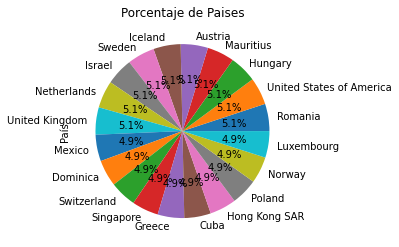

In [4]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
from matplotlib import pyplot
from matplotlib import colors 
from matplotlib import cm 

data['País'].value_counts().head(20).plot.pie(autopct="%0.1f%%")
plt.pyplot.title("Porcentaje de Paises")
plt.pyplot.show()

## Graficar datos univariantes.
### Grafica de barras y datos categoricos:


Mostramos el siguiente histograma sin ninguna manipulación de datos, para observar la distribución de los mismos. Nos damos cuenta como se ve de manera MINIATURA el conjunto de ellos del lado izquierdo.

<AxesSubplot:>

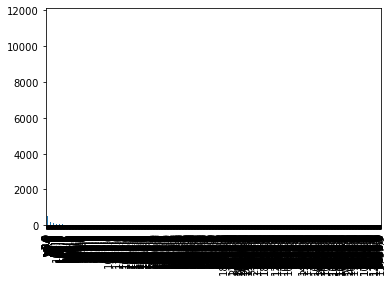

In [33]:
data['Número_De_Suicidios'].value_counts().plot.bar()

Para observarlos mejor, podemos graficar solo una pequeña cantidad de datos con la funcion "head".

<AxesSubplot:>

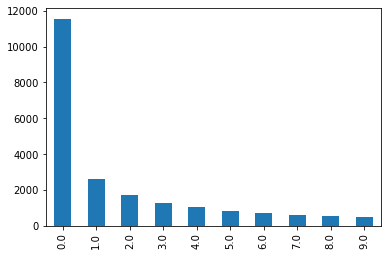

In [34]:
data['Número_De_Suicidios'].value_counts().head(10).plot.bar()

Vemos como la distribución de datos va disminuyendo de izquierda a derecha, cosa que confirmamos una vez más.

Lo representamos de diferentes maneras:

### Gráfico de Líneas

<AxesSubplot:>

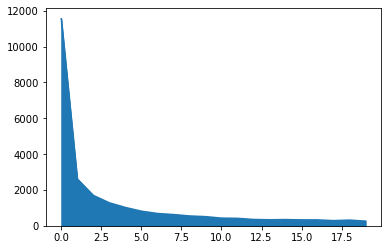

In [35]:
data['Número_De_Suicidios'].value_counts().sort_index().head(20).plot.area()

### Histograma

<AxesSubplot:ylabel='Frequency'>

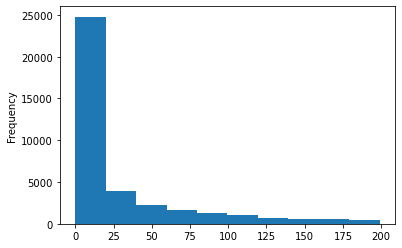

In [36]:
data[data['Número_De_Suicidios'] < 200]['Número_De_Suicidios'].plot.hist()

Ahora bien, graficaremos de igual manera la columna de población para poder observar diferencias o similitudes.

<AxesSubplot:ylabel='Frequency'>

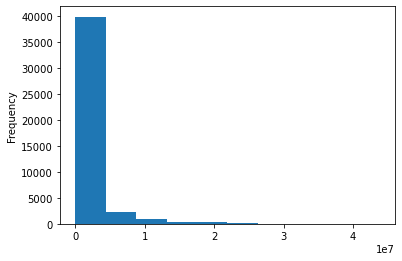

In [40]:
data['Población'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

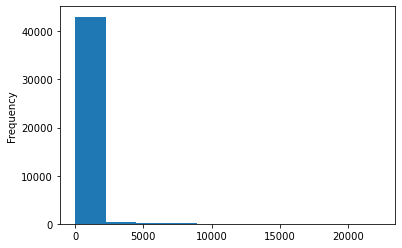

In [38]:
data['Número_De_Suicidios'].plot.hist()

## Graficar datos bi-variantes
#### Scatter plot

<AxesSubplot:xlabel='Número_De_Suicidios', ylabel='Año'>

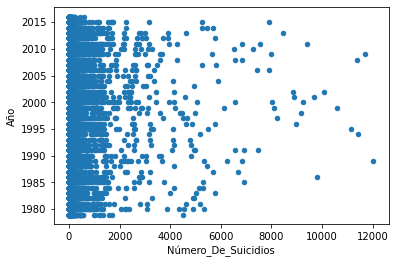

In [46]:
data[data['Número_De_Suicidios'] < 14000].sample(14000).plot.scatter(x='Número_De_Suicidios', y='Año')

Este gráfico nos ayudará a obervar (por año) los números totales de suicidios para así encontrar de una manera mas eficiente los años en los que hay mas y menos eventos para así reponder un par de nuestras preguntas.
Podemos observar que aparentemente los años con menos suicidios serían en 1979 y 2015 y observamos que en los años desde 1980 a 2014 hay un número elevado de suicidios entre 0 a 2000 suicidios y también vemos que aunque son pocas, llegan hasta 12000 suicidios.

<AxesSubplot:xlabel='Número_De_Suicidios', ylabel='Año'>

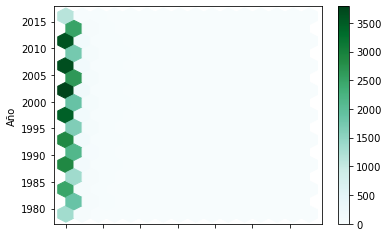

In [47]:
data[data['Número_De_Suicidios'] < 14000].plot.hexbin(x='Número_De_Suicidios', y='Año', gridsize=15)


Este segundo gráfico de bi-variantes podemos confirmar lo anterior observando que los años en los que esta el color más claro, o sea que, con menos suicidios se repetirían siendo 1979 y 2015.

<AxesSubplot:>

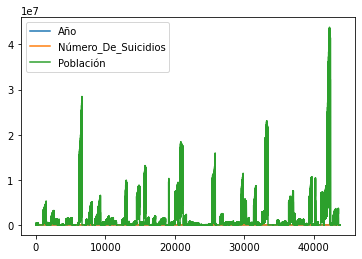

In [51]:
data.plot.line()

Podemos ver que al realizar la función de arriba nos grafica lo que viene siendo nuestra columna de año, en esta ocasión no nos sirve mucho por lo que obtamos por eliminarla.

<AxesSubplot:>

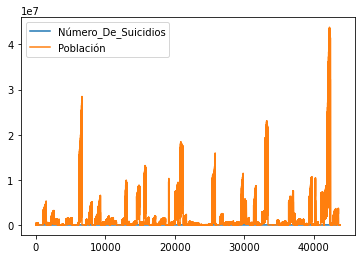

In [50]:
data1 = data.drop(['Año'], axis=1)
data1.plot.line()

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

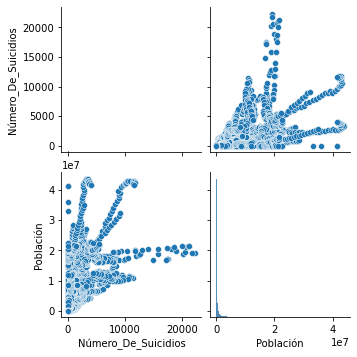

In [61]:
sns.pairplot(data[['Número_De_Suicidios', 'Población']])

Este gráfico nos muestra la relación cruzada de nuestros datos de población y número de suicidios viendo que NO siguen una tendencia alguna, por lo que podriamos concluir que no existe relación alguna entre estas variables.

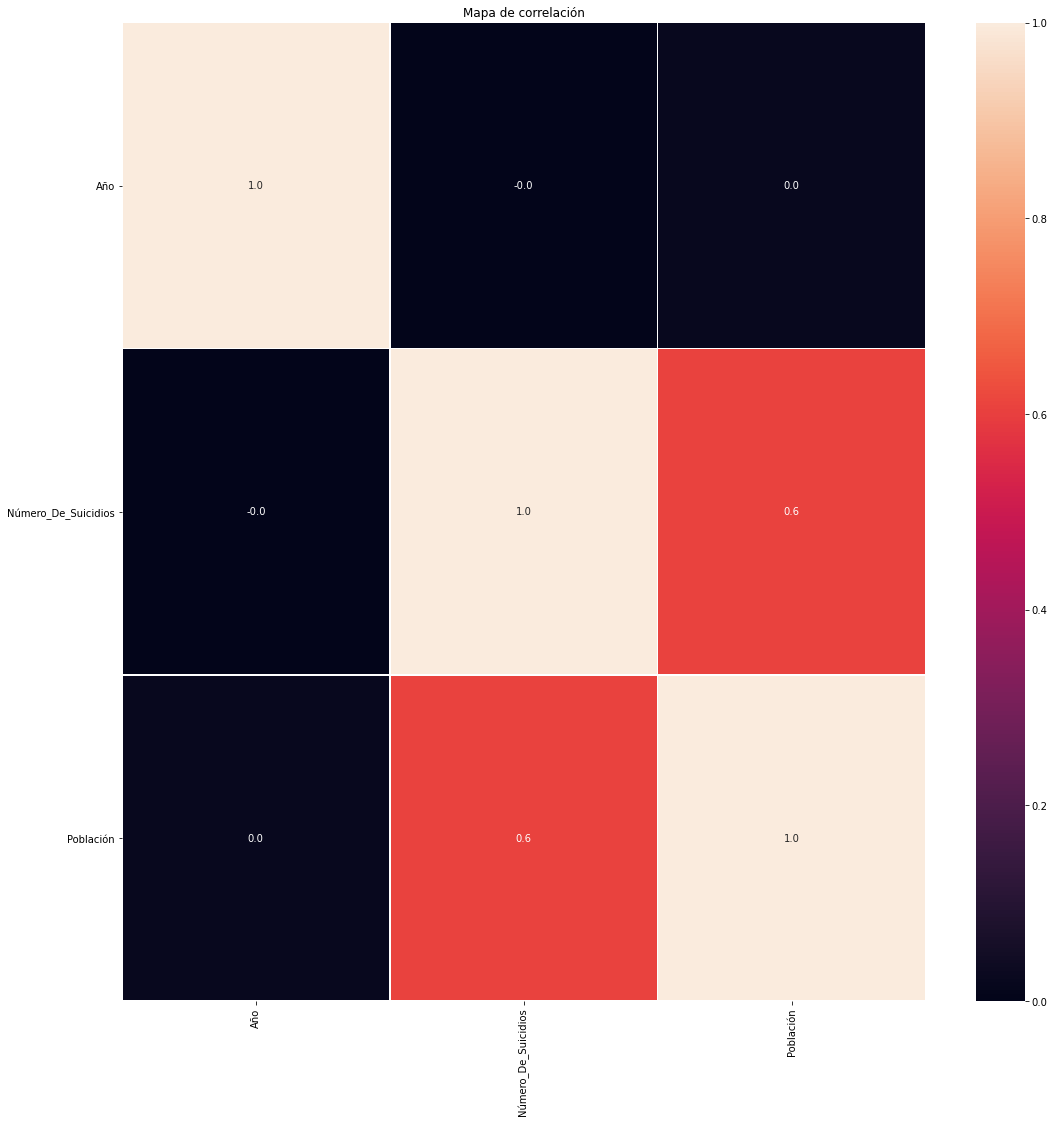

In [65]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Aquí podemos observar las relaciones que tienen las variables una con la otra, se observa que el año no tiene relación alguna con el número de suicidios por lo que con esto podriamos utilizar la herramienta de series del tiempo para poder analizar nuestros datos de manera predictiva.

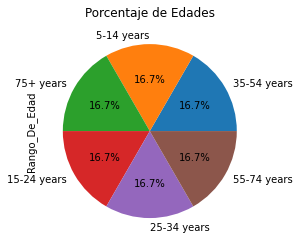

In [82]:
data['Rango_De_Edad'].value_counts().plot.pie(autopct="%0.1f%%")
plt.pyplot.title("Porcentaje de Edades")
plt.pyplot.show()

## Conclusiones

Observamos que el número de suicidios (sin importar el rango de edad) son similares en todos ellos, respondiendo así una de nuestras preguntas concluyendo que el rango de edad no es un gran factor a estos eventos pues podemos ver que suceden en cantidades iguales.